# Membuat Peta Kepadatan Provinsi DKI Jakarta Per Kelurahan

#  1. Melakukan Perhitungan Kepadatan Penduduk Per Kelurahan 2020

Sumber Data : <br> <font color=blue>data.jakarta.go.id</font>

In [1]:
# import library

import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Membaca Sumber Data
data_penduduk = pd.read_csv('data_penduduk_2020.csv')
data_wilayah = pd.read_csv('data_wilayah_2019.csv')

In [3]:
data_penduduk.head()

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk,Unnamed: 8
0,2020,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,00-04,Laki-laki,372,NaN
1,2020,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,05-09,Laki-laki,351,NaN
2,2020,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,10-14,Laki-laki,291,NaN
3,2020,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,15-19,Laki-laki,305,NaN
4,2020,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,20-24,Laki-laki,346,NaN


In [4]:
data_wilayah

,tahun,nama_provinsi,nama_kabupaten/kota,nama_kecamatan,nama_kelurahan,luas_wilayah_(km2),kepadatan_(jiwa/km2)
0,2019,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.6210,11374
1,2019,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,2.5847,2777
2,2019,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,2.4472,1080
3,2019,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,1.0285,2426
4,2019,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,1.0690,5609
...,...,...,...,...,...,...,...
262,2019,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,MUNJUL,1.9030,15245
263,2019,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,SETU,3.2512,7657
264,2019,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3.1652,10056
265,2019,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,LUBANG BUAYA,3.7220,20918


In [5]:
# Melakukan Seleksi Pada Kolom-kolom yang digunakan
data_penduduk = data_penduduk.groupby(['nama_kabupaten_kota','nama_kecamatan','nama_kelurahan'])['jumlah_penduduk'].sum().reset_index()
data_wilayah = data_wilayah[['nama_kelurahan', 'luas_wilayah_(km2)']]

In [6]:
data_penduduk

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_penduduk
0,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU SELATAN,PULAU PARI,3680
1,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU SELATAN,PULAU TIDUNG,6078
2,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU SELATAN,PULAU UNTUNG JAWA,2547
3,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,2648
4,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU KELAPA,7171
...,...,...,...,...
262,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,37773
263,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,87895
264,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,78898
265,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43865


In [7]:
data_wilayah

,nama_kelurahan,luas_wilayah_(km2)
0,P. PANGGANG,0.6210
1,P. KELAPA,2.5847
2,P. HARAPAN,2.4472
3,P. UNTUNG JAWA,1.0285
4,P. TIDUNG,1.0690
...,...,...
262,MUNJUL,1.9030
263,SETU,3.2512
264,BAMBU APUS,3.1652
265,LUBANG BUAYA,3.7220


In [8]:
# Memilih kotamadya yang akan dipetakan (menghilangkan Kepulauan Seribu)
data_penduduk = data_penduduk[(data_penduduk['nama_kabupaten_kota'] == 'JAKARTA BARAT') |
                              (data_penduduk['nama_kabupaten_kota'] == 'JAKARTA TIMUR') |
                              (data_penduduk['nama_kabupaten_kota'] == 'JAKARTA UTARA') |
                              (data_penduduk['nama_kabupaten_kota'] == 'JAKARTA SELATAN') |
                              (data_penduduk['nama_kabupaten_kota'] == 'JAKARTA PUSAT')
                             ]

In [9]:
data_penduduk

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_penduduk
6,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,82648
7,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,102296
8,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,98339
9,JAKARTA BARAT,CENGKARENG,KAPUK,171610
10,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,41033
...,...,...,...,...
262,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,37773
263,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,87895
264,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,78898
265,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43865


In [10]:
data_penduduk.reset_index(drop=True)

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_penduduk
0,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,82648
1,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,102296
2,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,98339
3,JAKARTA BARAT,CENGKARENG,KAPUK,171610
4,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,41033
...,...,...,...,...
256,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,37773
257,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,87895
258,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,78898
259,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43865


In [11]:
# Melakukan Pengecekan kesamaa nama kelurahan di data_penduduk, dan data_wilayah

for index, row in data_penduduk['nama_kelurahan'].iteritems():
    if row in data_wilayah['nama_kelurahan'].tolist():
        pass
    else:
        print('nama_kelurahan', row, 'tidak ada di data_wilayah')

nama_kelurahan JATIPULO tidak ada di data_wilayah
nama_kelurahan KRENDANG tidak ada di data_wilayah
nama_kelurahan RAWAJATI tidak ada di data_wilayah
nama_kelurahan BALEKAMBANG tidak ada di data_wilayah
nama_kelurahan KRAMATJATI tidak ada di data_wilayah
nama_kelurahan TENGAH tidak ada di data_wilayah
nama_kelurahan PINANGRANTI tidak ada di data_wilayah
nama_kelurahan PALMERIAM tidak ada di data_wilayah
nama_kelurahan KALIBARU tidak ada di data_wilayah


In [12]:
# Menyamakan data nama_kelurahan
data_wilayah.replace('JATI PULO', 'JATIPULO', inplace = True)
data_wilayah.replace('KERENDANG', 'KRENDANG', inplace = True)
data_wilayah.replace('RAWA JATI', 'RAWAJATI', inplace = True)
data_wilayah.replace('BALE KAMBANG', 'BALEKAMBANG', inplace = True)
data_wilayah.replace('KRAMAT JATI', 'KRAMATJATI', inplace = True)
data_wilayah.replace('KAMPUNG TENGAH', 'TENGAH', inplace = True)
data_wilayah.replace('PINANG RANTI', 'PINANGRANTI', inplace = True)
data_wilayah.replace('PAL MERIAM', 'PALMERIAM', inplace = True)
data_wilayah.replace('KALI BARU', 'KALIBARU', inplace = True)

# Massage dibawah hanyalah warning bukan error

In [13]:
# Melakukan Pengecekan Kembali apakan data nama_kelurahan sudah sama
for index, row in data_penduduk['nama_kelurahan'].iteritems():
    if row in data_wilayah['nama_kelurahan'].tolist():
        pass
    else:
        print('nama_kelurahan', row, 'tidak ada di data_wilayah')
        
# Jika tidak ada yang ter print berarti data nama_kelurahan sudah sama

In [14]:
# Menyatukan data_penduduk dan data_wilayah nama kolom nama_kelurahan
data_kepadatan = data_penduduk.merge(data_wilayah, on='nama_kelurahan')

In [15]:
data_kepadatan
# pada dataframe dibawah sudah terlihat kolom jumlah_penduduk sudah berada bersama kolom luas_wilayah_(km2)

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_penduduk,luas_wilayah_(km2)
0,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,82648,3.6059
1,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,102296,4.5150
2,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,98339,5.9100
3,JAKARTA BARAT,CENGKARENG,KAPUK,171610,5.6268
4,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,41033,2.8135
...,...,...,...,...,...
256,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,37773,2.3640
257,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,87895,7.0226
258,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,78898,4.5817
259,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43865,5.5400


In [16]:
# Menghitung kepadatan penduduk (jumlah_penduduk / luas_wilayah_(km2))

data_kepadatan['kepadatan'] = data_kepadatan['jumlah_penduduk'] / data_kepadatan['luas_wilayah_(km2)']

In [17]:
data_kepadatan

# pada dataframe dibawah terlihat kolom baru kepadatan hasil dari peritungan sebelumnya

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_penduduk,luas_wilayah_(km2),kepadatan
0,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,82648,3.6059,22920.214094
1,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,102296,4.5150,22656.921373
2,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,98339,5.9100,16639.424704
3,JAKARTA BARAT,CENGKARENG,KAPUK,171610,5.6268,30498.684865
4,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,41033,2.8135,14584.325573
...,...,...,...,...,...,...
256,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,37773,2.3640,15978.426396
257,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,87895,7.0226,12516.019708
258,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,78898,4.5817,17220.245760
259,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43865,5.5400,7917.870036


# 2. Membuat Dataframe Batas-batas Kelurahan DKI Jakarta

Untuk membuat peta berdasarkan batas-batas wilayah, dibutuhkan file berformat geojson atau shp.
<br>
<br> 
GeoJSON adalah sebuat format pengkodean berbagai struktur data geografis yang berbasis format JSON (Javascript Object Notation). GeoJSON mendukung beberapa tipe geometri seperti Point, LineString, Polygon, dan tipe-tipe geometri multi lainnya. Tipe Point (Titik) biasa digunakan untuk menggambarkan suatu alamat dan lokasi. Tipe LineString (Garis) biasa digunakan untuk menggambarkan suatu jalan raya dan perbatasan. Tipe Polygon (Poligon) biasanya digunakan untuk menggambarkan suatu wilayah seperti negara, provinsi, dan bidang tanah. (https://berqas.com/cara-mudah-membuat-file-geojson-menggunakan-geojson-io/)
<br>
<br>
File geojson batas-batas kelurahan di wilayah DKI Jakarta bisa di download pada link dibawah ini
<br>
<br>
Untuk membuat peta di python dibutuhkan library json untuk membaca file geojson dan geopandas untuk memodelkan kode struktur geografis yang ada di file json atau shp

In [18]:
# Import library

import json
import geopandas as gpd
from geopandas import GeoDataFrame

In [19]:
# Membaca file geojson

batas_kelurahan = gpd.read_file('C:/Users/fajar/Desktop/Belajar Python Data Analyst/belajar cloropleth map/Jakarta2/Keluruhan-DKI-Jakarta.geojson')

In [20]:
batas_kelurahan.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  268 non-null    object  
 1   @id                 268 non-null    object  
 2   admin_level         268 non-null    object  
 3   boundary            268 non-null    object  
 4   is_in:municipality  268 non-null    object  
 5   is_in:province      268 non-null    object  
 6   is_in:town          268 non-null    object  
 7   name                268 non-null    object  
 8   type                268 non-null    object  
 9   note                0 non-null      object  
 10  is_in:city          1 non-null      object  
 11  @relations          0 non-null      object  
 12  geometry            268 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 27.3+ KB


In [21]:
# Kolom geometry berisi koordinat batas-batas geografis masing masing kelurahan
batas_kelurahan

,id,@id,admin_level,boundary,is_in:municipality,is_in:province,is_in:town,name,type,note,is_in:city,@relations,geometry
0,relation/5802121,relation/5802121,7,administrative,Pademangan,DKI Jakarta,Jakarta Utara,Ancol,boundary,None,None,None,"POLYGON ((106.82334 -6.11568, 106.81722 -6.114..."
1,relation/5802122,relation/5802122,7,administrative,Tambora,DKI Jakarta,Jakarta Barat,Pekojan,boundary,None,None,None,"POLYGON ((106.80427 -6.13241, 106.80321 -6.132..."
2,relation/5802123,relation/5802123,7,administrative,Cilincing,DKI Jakarta,Jakarta Utara,Marunda,boundary,None,None,None,"POLYGON ((106.95896 -6.13234, 106.95958 -6.132..."
3,relation/5802124,relation/5802124,7,administrative,Pulo Gadung,DKI Jakarta,Jakarta Timur,Kayu Putih,boundary,None,None,None,"POLYGON ((106.87588 -6.17886, 106.87578 -6.180..."
4,relation/5802125,relation/5802125,7,administrative,Koja,DKI Jakarta,Jakarta Utara,Lagoa,boundary,None,None,None,"POLYGON ((106.90305 -6.11204, 106.90307 -6.113..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,relation/7198542,relation/7198542,7,administrative,Tebet,DKI Jakarta,Jakarta Selatan,Menteng Dalam,boundary,None,None,None,"POLYGON ((106.84733 -6.22898, 106.84745 -6.227..."
264,relation/7210655,relation/7210655,7,administrative,Tebet,DKI Jakarta,Jakarta Selatan,Bukit Duri,boundary,None,None,None,"POLYGON ((106.85894 -6.21635, 106.85874 -6.216..."
265,relation/7212530,relation/7212530,7,administrative,Menteng,DKI Jakarta,Jakarta Pusat,Menteng,boundary,None,None,None,"POLYGON ((106.84499 -6.20363, 106.84498 -6.203..."
266,relation/7212612,relation/7212612,7,administrative,Menteng,DKI Jakarta,Jakarta Pusat,Pegangsaan,boundary,None,None,None,"POLYGON ((106.84305 -6.20089, 106.84326 -6.201..."


In [22]:
# Memilih / Menyeleksi kolom-kolom yang akan digunakan yaitu name (nama_kelurahan) dan geometry
batas_kelurahan = batas_kelurahan[['name', 'geometry']]
batas_kelurahan

,name,geometry
0,Ancol,"POLYGON ((106.82334 -6.11568, 106.81722 -6.114..."
1,Pekojan,"POLYGON ((106.80427 -6.13241, 106.80321 -6.132..."
2,Marunda,"POLYGON ((106.95896 -6.13234, 106.95958 -6.132..."
3,Kayu Putih,"POLYGON ((106.87588 -6.17886, 106.87578 -6.180..."
4,Lagoa,"POLYGON ((106.90305 -6.11204, 106.90307 -6.113..."
...,...,...
263,Menteng Dalam,"POLYGON ((106.84733 -6.22898, 106.84745 -6.227..."
264,Bukit Duri,"POLYGON ((106.85894 -6.21635, 106.85874 -6.216..."
265,Menteng,"POLYGON ((106.84499 -6.20363, 106.84498 -6.203..."
266,Pegangsaan,"POLYGON ((106.84305 -6.20089, 106.84326 -6.201..."


In [23]:
# mengubah nama kolom 'name' menjadi 'nama_kelurahan'
batas_kelurahan.rename(columns={'name' : 'nama_kelurahan'}, inplace=True)
batas_kelurahan

,nama_kelurahan,geometry
0,Ancol,"POLYGON ((106.82334 -6.11568, 106.81722 -6.114..."
1,Pekojan,"POLYGON ((106.80427 -6.13241, 106.80321 -6.132..."
2,Marunda,"POLYGON ((106.95896 -6.13234, 106.95958 -6.132..."
3,Kayu Putih,"POLYGON ((106.87588 -6.17886, 106.87578 -6.180..."
4,Lagoa,"POLYGON ((106.90305 -6.11204, 106.90307 -6.113..."
...,...,...
263,Menteng Dalam,"POLYGON ((106.84733 -6.22898, 106.84745 -6.227..."
264,Bukit Duri,"POLYGON ((106.85894 -6.21635, 106.85874 -6.216..."
265,Menteng,"POLYGON ((106.84499 -6.20363, 106.84498 -6.203..."
266,Pegangsaan,"POLYGON ((106.84305 -6.20089, 106.84326 -6.201..."


In [24]:
data_kepadatan

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_penduduk,luas_wilayah_(km2),kepadatan
0,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,82648,3.6059,22920.214094
1,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,102296,4.5150,22656.921373
2,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,98339,5.9100,16639.424704
3,JAKARTA BARAT,CENGKARENG,KAPUK,171610,5.6268,30498.684865
4,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,41033,2.8135,14584.325573
...,...,...,...,...,...,...
256,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,37773,2.3640,15978.426396
257,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,87895,7.0226,12516.019708
258,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,78898,4.5817,17220.245760
259,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43865,5.5400,7917.870036


In [25]:
# Melakukan iterasi dan pengecekan kembali pada data_kepadatan dan batas_kelurahan

for index, row in data_kepadatan['nama_kelurahan'].iteritems():
    if row in batas_kelurahan['nama_kelurahan'].tolist():
        pass
    else:
        print('nama_kelurahan', row, 'tidak ada di batas_kelurahan')

nama_kelurahan CENGKARENG BARAT tidak ada di batas_kelurahan
nama_kelurahan CENGKARENG TIMUR tidak ada di batas_kelurahan
nama_kelurahan DURI KOSAMBI tidak ada di batas_kelurahan
nama_kelurahan KAPUK tidak ada di batas_kelurahan
nama_kelurahan KEDAUNG KALI ANGKE tidak ada di batas_kelurahan
nama_kelurahan RAWA BUAYA tidak ada di batas_kelurahan
nama_kelurahan GROGOL tidak ada di batas_kelurahan
nama_kelurahan JELAMBAR tidak ada di batas_kelurahan
nama_kelurahan JELAMBAR BARU tidak ada di batas_kelurahan
nama_kelurahan TANJUNG DUREN SELATAN tidak ada di batas_kelurahan
nama_kelurahan TANJUNG DUREN UTARA tidak ada di batas_kelurahan
nama_kelurahan TOMANG tidak ada di batas_kelurahan
nama_kelurahan WIJAYA KUSUMA tidak ada di batas_kelurahan
nama_kelurahan KALIDERES tidak ada di batas_kelurahan
nama_kelurahan KAMAL tidak ada di batas_kelurahan
nama_kelurahan PEGADUNGAN tidak ada di batas_kelurahan
nama_kelurahan SEMANAN tidak ada di batas_kelurahan
nama_kelurahan TEGAL ALUR tidak ada di ba

nama_kelurahan CIPAYUNG tidak ada di batas_kelurahan
nama_kelurahan LUBANG BUAYA tidak ada di batas_kelurahan
nama_kelurahan MUNJUL tidak ada di batas_kelurahan
nama_kelurahan PONDOK RANGGON tidak ada di batas_kelurahan
nama_kelurahan SETU tidak ada di batas_kelurahan
nama_kelurahan CIBUBUR tidak ada di batas_kelurahan
nama_kelurahan CIRACAS tidak ada di batas_kelurahan
nama_kelurahan KELAPA DUA WETAN tidak ada di batas_kelurahan
nama_kelurahan RAMBUTAN tidak ada di batas_kelurahan
nama_kelurahan SUSUKAN tidak ada di batas_kelurahan
nama_kelurahan DUREN SAWIT tidak ada di batas_kelurahan
nama_kelurahan KLENDER tidak ada di batas_kelurahan
nama_kelurahan MALAKA JAYA tidak ada di batas_kelurahan
nama_kelurahan MALAKA SARI tidak ada di batas_kelurahan
nama_kelurahan PONDOK BAMBU tidak ada di batas_kelurahan
nama_kelurahan PONDOK KELAPA tidak ada di batas_kelurahan
nama_kelurahan PONDOK KOPI tidak ada di batas_kelurahan
nama_kelurahan BALI MESTER tidak ada di batas_kelurahan
nama_kelurahan

In [26]:
# Pada batas_kelurahan terlihat bahwa nama_kelurahan menggunakan uppercase pada setiap awal kata (atau biasa disebut berformat title)
# Sementara pada data_kepdatan menggunakan uppercase pada seluruh hurufnya
# Mengubah nama_kelurahan pada batas_kelurahan menjadi seperti di data_kepadata
batas_kelurahan['nama_kelurahan'] = batas_kelurahan['nama_kelurahan'].str.upper()
batas_kelurahan

,nama_kelurahan,geometry
0,ANCOL,"POLYGON ((106.82334 -6.11568, 106.81722 -6.114..."
1,PEKOJAN,"POLYGON ((106.80427 -6.13241, 106.80321 -6.132..."
2,MARUNDA,"POLYGON ((106.95896 -6.13234, 106.95958 -6.132..."
3,KAYU PUTIH,"POLYGON ((106.87588 -6.17886, 106.87578 -6.180..."
4,LAGOA,"POLYGON ((106.90305 -6.11204, 106.90307 -6.113..."
...,...,...
263,MENTENG DALAM,"POLYGON ((106.84733 -6.22898, 106.84745 -6.227..."
264,BUKIT DURI,"POLYGON ((106.85894 -6.21635, 106.85874 -6.216..."
265,MENTENG,"POLYGON ((106.84499 -6.20363, 106.84498 -6.203..."
266,PEGANGSAAN,"POLYGON ((106.84305 -6.20089, 106.84326 -6.201..."


In [27]:
# Menjalankan kembali pengecekan nama_kelurahan
for index, row in data_kepadatan['nama_kelurahan'].iteritems():
    if row in batas_kelurahan['nama_kelurahan'].tolist():
        pass
    else:
        print('nama_kelurahan', row, 'tidak ada di batas_kelurahan')

nama_kelurahan JATIPULO tidak ada di batas_kelurahan
nama_kelurahan KALI ANYAR tidak ada di batas_kelurahan
nama_kelurahan HARAPAN MULIA tidak ada di batas_kelurahan
nama_kelurahan SETIA BUDI tidak ada di batas_kelurahan
nama_kelurahan BALEKAMBANG tidak ada di batas_kelurahan
nama_kelurahan KRAMATJATI tidak ada di batas_kelurahan
nama_kelurahan TENGAH tidak ada di batas_kelurahan
nama_kelurahan HALIM PERDANA KUSUMAH tidak ada di batas_kelurahan
nama_kelurahan PINANGRANTI tidak ada di batas_kelurahan
nama_kelurahan KALIBARU tidak ada di batas_kelurahan
nama_kelurahan SUKAPURA tidak ada di batas_kelurahan
nama_kelurahan RAWA BADAK SELATAN tidak ada di batas_kelurahan
nama_kelurahan RAWA BADAK UTARA tidak ada di batas_kelurahan
nama_kelurahan PEJAGALAN tidak ada di batas_kelurahan


In [28]:
# Menyamakan kembali nama_kelurahan di data_kepadatan dan batas_kelurahan
batas_kelurahan.replace('JATI PULO', 'JATIPULO', inplace = True)
batas_kelurahan.replace('KALIANYAR', 'KALI ANYAR', inplace = True)
batas_kelurahan.replace('HARAPAN MULYA', 'HARAPAN MULIA', inplace = True)
batas_kelurahan.replace('SETIABUDI', 'SETIA BUDI', inplace = True)
batas_kelurahan.replace('BALE KAMBANG', 'BALEKAMBANG', inplace = True)
batas_kelurahan.replace('KRAMAT JATI', 'KRAMATJATI', inplace = True)
batas_kelurahan.replace('KAMPUNG TENGAH', 'TENGAH', inplace = True)
batas_kelurahan.replace('HALIM PERDANA KUSUMA', 'HALIM PERDANA KUSUMAH', inplace = True)
batas_kelurahan.replace('PINANG RANTI', 'PINANGRANTI', inplace = True)
batas_kelurahan.replace('KALI BARU', 'KALIBARU', inplace = True)
batas_kelurahan.replace('SUKA PURA', 'SUKAPURA', inplace = True)
batas_kelurahan.replace('RAWABADAK SELATAN', 'RAWA BADAK SELATAN', inplace = True)
batas_kelurahan.replace('RAWABADAK UTARA', 'RAWA BADAK UTARA', inplace = True)
batas_kelurahan.replace('PENJAGALAN', 'PEJAGALAN', inplace = True)
batas_kelurahan

,nama_kelurahan,geometry
0,ANCOL,"POLYGON ((106.82334 -6.11568, 106.81722 -6.114..."
1,PEKOJAN,"POLYGON ((106.80427 -6.13241, 106.80321 -6.132..."
2,MARUNDA,"POLYGON ((106.95896 -6.13234, 106.95958 -6.132..."
3,KAYU PUTIH,"POLYGON ((106.87588 -6.17886, 106.87578 -6.180..."
4,LAGOA,"POLYGON ((106.90305 -6.11204, 106.90307 -6.113..."
...,...,...
263,MENTENG DALAM,"POLYGON ((106.84733 -6.22898, 106.84745 -6.227..."
264,BUKIT DURI,"POLYGON ((106.85894 -6.21635, 106.85874 -6.216..."
265,MENTENG,"POLYGON ((106.84499 -6.20363, 106.84498 -6.203..."
266,PEGANGSAAN,"POLYGON ((106.84305 -6.20089, 106.84326 -6.201..."


In [29]:
# Menjalankan kembali pengecekan nama_kelurahan
for index, row in data_kepadatan['nama_kelurahan'].iteritems():
    if row in batas_kelurahan['nama_kelurahan'].tolist():
        pass
    else:
        print('nama_kelurahan', row, 'tidak ada di batas_kelurahan')

In [30]:
# Melakukan merge data_kepadatan dan batas_kelurahan pada kolom 'nama_kelurahan'
peta_kepadatan = data_kepadatan.merge(batas_kelurahan, on='nama_kelurahan')
peta_kepadatan

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_penduduk,luas_wilayah_(km2),kepadatan,geometry
0,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,82648,3.6059,22920.214094,"POLYGON ((106.71665 -6.13754, 106.71665 -6.137..."
1,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,102296,4.5150,22656.921373,"POLYGON ((106.74038 -6.15502, 106.74078 -6.155..."
2,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,98339,5.9100,16639.424704,"POLYGON ((106.71444 -6.18206, 106.71561 -6.182..."
3,JAKARTA BARAT,CENGKARENG,KAPUK,171610,5.6268,30498.684865,"POLYGON ((106.75069 -6.14384, 106.75071 -6.143..."
4,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,41033,2.8135,14584.325573,"POLYGON ((106.75069 -6.14384, 106.75066 -6.144..."
...,...,...,...,...,...,...,...
256,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,37773,2.3640,15978.426396,"POLYGON ((106.88394 -6.12702, 106.88376 -6.127..."
257,JAKARTA UTARA,TANJUNG PRIOK,SUNTER AGUNG,87895,7.0226,12516.019708,"POLYGON ((106.87749 -6.14543, 106.87699 -6.142..."
258,JAKARTA UTARA,TANJUNG PRIOK,SUNTER JAYA,78898,4.5817,17220.245760,"POLYGON ((106.88713 -6.14132, 106.88624 -6.141..."
259,JAKARTA UTARA,TANJUNG PRIOK,TANJUNG PRIOK,43865,5.5400,7917.870036,"MULTIPOLYGON (((106.89307 -6.11129, 106.89313 ..."


In [31]:
peta_kepadatan = peta_kepadatan[['nama_kelurahan', 'kepadatan', 'geometry']]
peta_kepadatan

,nama_kelurahan,kepadatan,geometry
0,CENGKARENG BARAT,22920.214094,"POLYGON ((106.71665 -6.13754, 106.71665 -6.137..."
1,CENGKARENG TIMUR,22656.921373,"POLYGON ((106.74038 -6.15502, 106.74078 -6.155..."
2,DURI KOSAMBI,16639.424704,"POLYGON ((106.71444 -6.18206, 106.71561 -6.182..."
3,KAPUK,30498.684865,"POLYGON ((106.75069 -6.14384, 106.75071 -6.143..."
4,KEDAUNG KALI ANGKE,14584.325573,"POLYGON ((106.75069 -6.14384, 106.75066 -6.144..."
...,...,...,...
256,SUNGAI BAMBU,15978.426396,"POLYGON ((106.88394 -6.12702, 106.88376 -6.127..."
257,SUNTER AGUNG,12516.019708,"POLYGON ((106.87749 -6.14543, 106.87699 -6.142..."
258,SUNTER JAYA,17220.245760,"POLYGON ((106.88713 -6.14132, 106.88624 -6.141..."
259,TANJUNG PRIOK,7917.870036,"MULTIPOLYGON (((106.89307 -6.11129, 106.89313 ..."


# 3. Membuat Plotting Peta Kepadatan Jakarta

In [32]:
import mapclassify as mc
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [33]:
peta_kepadatan = GeoDataFrame(peta_kepadatan)

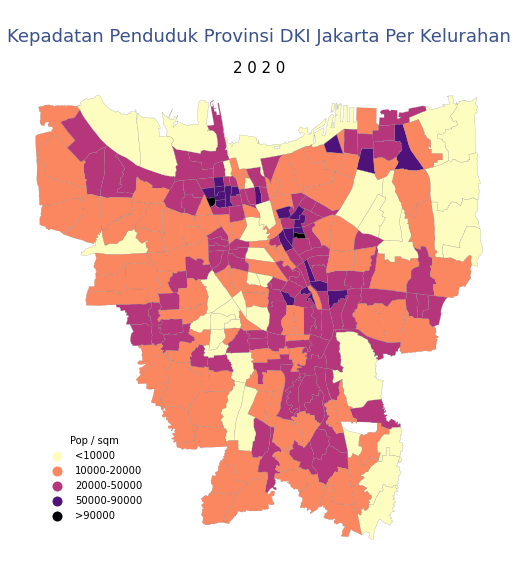

In [35]:
fig, ax = plt.subplots(figsize=(12, 9), facecolor='#FFF')
ax.set_title("\nKepadatan Penduduk Provinsi DKI Jakarta Per Kelurahan\n", fontsize=18, color='#3B518B', pad=10)
ax.text(0.5,1.0, "2 0 2 0", size=15, ha="center", transform=ax.transAxes)
divider = make_axes_locatable(ax)

peta_kepadatan.plot(column = 'kepadatan', 
                    scheme = 'user_defined',
                    classification_kwds={'bins':[10000, 20000, 50000, 90000]},
                    cmap = 'magma_r',
                    ax = ax,
                    edgecolor = 'gray',
                    linewidth = 0.2,
                    legend=True,
                    legend_kwds = dict(loc='upper left',
                                       bbox_to_anchor=(0.05, 0.275),
                                       title = 'Pop / sqm',
                                       frameon = False,
                                       facecolor = 'black',
                                       labels=[
                                           '<10000',
                                           '10000-20000',
                                           '20000-50000',
                                           '50000-90000',
                                           '>90000'])
                   )

ax.set_axis_off();